In [1]:
# Importaçoẽs

import pickle
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
%matplotlib inline
cores = list(mcolors.TABLEAU_COLORS.keys())
cores = [cor.split(':')[-1] for cor in cores]

# sns.set_context('paper')

def plot_params():
    plt.rc('text', usetex=True)
    plt.rc('font', size=13)
    plt.rc('xtick', labelsize=11)
    plt.rc('ytick', labelsize=11)
    plt.rc('axes', labelsize=14)
    plt.rc('legend', fontsize=8)
    plt.rc('lines', linewidth=1.0)
    plt.rcParams["axes.formatter.limits"] = (-3, 4)
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plot_params()


from matplotlib.colors import LinearSegmentedColormap
colors = ["yellow","gold","lawngreen","royalblue", "midnightblue","royalblue","lawngreen","gold","yellow"]
nodes = np.linspace(0, 1, len(colors))
cmap_phase = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

colors1 = ["black","gold","lawngreen"]
nodes1 = np.linspace(0, 1, len(colors1))
cmap_potential = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes1, colors1)))

colors = ["darkorange", "gold", "lawngreen", "lightseagreen","darkgreen"]
cmap_LOP = ListedColormap(colors)

colors = ["darkblue", "blue", "lawngreen","red"]
nodes = [0.0, 0.1, 0.3, 1.0]
cmap_Freq = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))


def get_numpy(data, ti, tf):
    """
    Converte os dados em formato de dicionário para matrizes NumPy.

    Args:
        data (dict): Dados no formato JSON armazenados em um tipo dicionário contendo informações sobre os valores de tensão de simulação.

    Returns:
        tuple: Uma tupla contendo um array NumPy representando os tempos e uma matriz NumPy representando os valores de tensão.
    """
    mapa = np.zeros((len(data['simData']['V_soma']), len(data['simData']['t'][ti:tf])))
    t = np.array(data['simData']['t'][ti:tf])
    for i, value in enumerate(data['simData']['V_soma'].values()):
        mapa[i] = value[ti:tf]
    return t, mapa


In [2]:
with open('../data/v0_batch0/v0_batch0_data.pkl','rb') as f:
    data = pickle.load(f)

In [12]:
t, vsomas = get_numpy(data, ti = 190000, tf=191000)


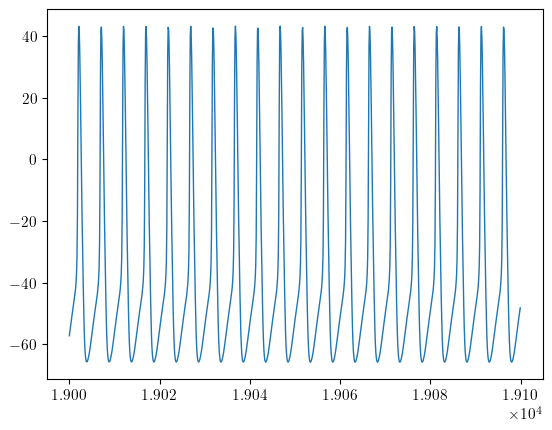

In [13]:
plt.plot(t, vsomas[0])

In [10]:
from numba import jit
import numpy as np 
import scipy
import sys
import os

@jit
def find_peaks(t_arr, v_arr, only_id=False):
    """
    Encontra os picos em um sinal de forma de onda.

    Args:
        t_arr (array-like): Uma matriz de tempos correspondentes aos valores do sinal de forma de onda.
        v_arr (array-like): Uma matriz de valores do sinal de forma de onda.
        only_id (bool, optional): Indica se apenas os IDs dos picos devem ser retornados. O padrão é False.

    Returns:
        tuple or numpy.ndarray: Se only_id for False, retorna uma tupla contendo os IDs dos picos, tempos correspondentes e valores correspondentes. Se only_id for True, retorna apenas os IDs dos picos.
    """
    peaks_id, _ = scipy.signal.find_peaks(v_arr, height=0)
    t = t_arr[peaks_id]
    v = v_arr[peaks_id]
    if only_id:
        peaks_id
    else:
        return peaks_id, t, v

In [11]:
peaks_id = find_peaks(t, vsomas, only_id=True)

ValueError: `x` must be a 1-D array